In [2]:
import pandas as pd
from matplotlib.patches import Patch
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

data_path = '/content/drive/MyDrive/webb lab DL/peak by cell matrices'

Mounted at /content/drive


In [12]:
# ALL neurons chromosome X
#all_data_X = pd.read_csv(f"{data_path}/all_neurons_chrX.csv", header=0)
#all_data_X = all_data_X.T
#all_labels_X = pd.read_csv(f"{data_path}/labels_all.csv", header=0)

# FEMALE neurons chromosome X
female_data_X = pd.read_csv(f"{data_path}/female_neurons_chrX.csv", header=0)
female_data_X = female_data_X.T
female_labels_X = pd.read_csv(f"{data_path}/labels_female.csv", header=0)

# MALE neurons chromosome X
male_data_X = pd.read_csv(f"{data_path}/male_neurons_chrX.csv", header=0)
male_data_X = male_data_X.T
male_labels_X = pd.read_csv(f"{data_path}/labels_male.csv", header=0)

In [8]:
#print("Num. TOTAL chrX samples/cells: " + str(all_data_X.shape[0]))
print("Num. FEMALE chrX samples/cells: " + str(female_data_X.shape[0]))
print("Num. MALE chrX samples/cells: " + str(male_data_X.shape[0]))

# 0 and 1 = is the region open/accessible or not for this cell? 
#if female_data_X.shape[1] == male_data_X.shape[1] == all_data_X.shape[1]: print("Num. regions in chromatin of chrX (peaks): " + str(female_data_X.shape[1])) 
#else: print("oh no")

Num. FEMALE chrX samples/cells: 11420
Num. MALE chrX samples/cells: 12316


In [10]:
female_data_X.head()

,chrX.50614426.50615387,chrX.169986567.169987514,chrX.135948499.135949464,chrX.136094181.136095125,chrX.103695053.103696076,chrX.135984575.135985573,chrX.136761159.136762155,chrX.50602431.50603442,chrX.50599727.50600690,chrX.75733341.75734382,...,chrX.134807495.134808434,chrX.102115374.102116289,chrX.73773858.73774861,chrX.111462882.111463831,chrX.94540137.94541178,chrX.134808560.134809484,chrX.47949422.47950405,chrX.72824711.72825688,chrX.73965063.73965592,chrX.102065858.102066805
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Num. female mice: 9
Num. female mice by age: 
M    3
A    3
Y    3
Name: age_status, dtype: int64


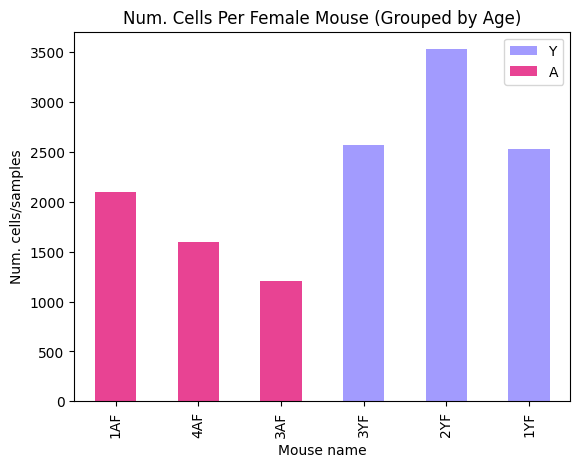

,name,age_status,num_samples
1,1AF,A,2098
2,4AF,A,1598
7,3AF,A,1211
4,3YF,Y,2568
5,2YF,Y,3530
6,1YF,Y,2534


In [17]:
from mpl_toolkits.mplot3d import axes3d
female_cells = female_data_X.index.tolist()
female_mouse_names_raw = [x.split(".")[1] for x in female_cells]
female_mice_df = pd.DataFrame({"name":female_mouse_names_raw, "age_status":female_labels_X["x"]})

unique_names_f = list(set(female_mice_df["name"].tolist()))
ages_f, num_samples_f = [], []
for name in unique_names_f:
  df = female_mice_df[female_mice_df["name"]==name]
  num_samples_f.append(df.shape[0])
  ages_f.append(df.iloc[0,1])

female_mice_stats_df = pd.DataFrame({"name":unique_names_f, "age_status":ages_f, "num_samples":num_samples_f})
num_per_age = female_mice_stats_df["age_status"].value_counts()
female_mice_stats_ordered_df = female_mice_stats_df.sort_values(by = "age_status")

female_mice_stats_ordered_df.drop(female_mice_stats_ordered_df[female_mice_stats_ordered_df['age_status'] == "M"].index, inplace = True)

print("Num. female mice: " + str(female_mice_stats_df.shape[0]))
print("Num. female mice by age: \n" + str(female_mice_stats_df["age_status"].value_counts()))

colors = {"Y":"#a29bfe", "A":"#e84393"}
plot = female_mice_stats_ordered_df.plot(kind="bar",x="name",y="num_samples",color=female_mice_stats_ordered_df['age_status'].replace(colors)).legend([Patch(facecolor=colors['Y']),Patch(facecolor=colors['A'])], ["Y", "A"])
plt.title("Num. Cells Per Female Mouse (Grouped by Age)")
plt.xlabel("Mouse name")
plt.ylabel("Num. cells/samples")
plt.show()

female_mice_stats_ordered_df.head(10)

Num. male mice: 9
Num. male mice by age: 
A    4
M    3
Y    2
Name: age_status, dtype: int64


,name,age_status,num_samples
0,1AM,A,2194
1,4AM,A,2217
2,3AM,A,1706
7,2AM,A,2582
4,1YM,Y,2344
5,3YM,Y,2525


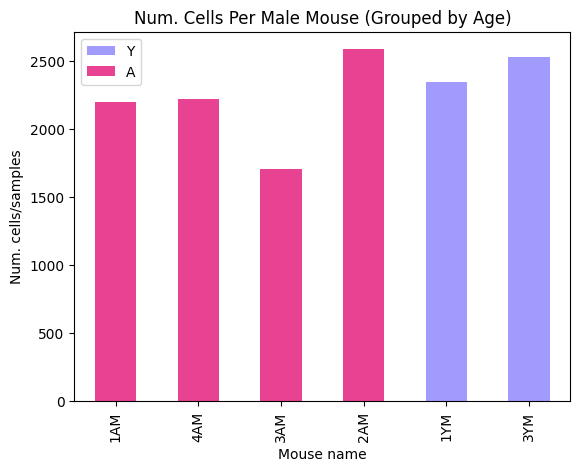

In [19]:
male_cells = male_data_X.index.tolist()
male_mouse_names_raw = [x.split(".")[1] for x in male_cells]
male_mice_df = pd.DataFrame({"name":male_mouse_names_raw, "age_status":male_labels_X["x"]})

unique_names_m = list(set(male_mice_df["name"].tolist()))
ages_m, num_samples_m = [], []
for name in unique_names_m:
  df = male_mice_df[male_mice_df["name"]==name]
  num_samples_m.append(df.shape[0])
  ages_m.append(df.iloc[0,1])

male_mice_stats_df = pd.DataFrame({"name":unique_names_m, "age_status":ages_m, "num_samples":num_samples_m})
num_per_age_m = male_mice_stats_df["age_status"].value_counts()
male_mice_stats_ordered_df = male_mice_stats_df.sort_values(by = "age_status")
male_mice_stats_ordered_df.drop(male_mice_stats_ordered_df[male_mice_stats_ordered_df['age_status'] == "M"].index, inplace = True)

print("Num. male mice: " + str(male_mice_stats_df.shape[0]))
print("Num. male mice by age: \n" + str(male_mice_stats_df["age_status"].value_counts()))

colors = {"Y":"#a29bfe", "A":"#e84393"}
hist = male_mice_stats_ordered_df.plot(kind="bar",x="name",y="num_samples",color=male_mice_stats_ordered_df['age_status'].replace(colors)).legend([Patch(facecolor=colors['Y']),Patch(facecolor=colors['A'])], ["Y", "A"])
plt.title("Num. Cells Per Male Mouse (Grouped by Age)")
plt.xlabel("Mouse name")
plt.ylabel("Num. cells/samples")
male_mice_stats_ordered_df.head(10)